In [165]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
#plt.style.use('seaborn-white')

### Preprocesamiento de los datos
Asegurarnos de que no hay datos faltantes y codificar variables categóricas si es necesario.

In [166]:
df = pd.read_csv('./Marketingcampaigns.csv') # lee archivo Excel.

# Mostrar las primeras filas del dataframe
df.head(3)

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1


El dataset tiene las siguientes columnas:

- **Customer id:** Identificador único del cliente
- **Age:** Edad del cliente
- **Gender:** Género del cliente (0 para masculino, 1 para femenino)
- **Location:** Ubicación del cliente
- **Email Opened:** Indicador de si el cliente abrió el email (1 para sí, 0 para no)
- **Email Clicked:** Indicador de si el cliente hizo clic en el correo electrónico (1 para sí, 0 para no)
- **Product page visit:** Número de visitas a la página del producto
- **Discount offered:** Indicador de si se ofreció un descuento (1 para sí, 0 para no)
- **Purchased**: Indicador de si el cliente compró el producto (1 para sí, 0 para no)


In [167]:
# Verificar si hay datos faltantes
df.isnull().sum()

# En mi dataset "Location" tiene datos categoricos

# Codificar la variable categórica 'Location'
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# El método factorize() es para convertir valores categóricos en códigos numéricos
df['Location_Brisbane0'] = df['Location_Brisbane'].factorize()[0]
df['Location_Perth0'] = df['Location_Perth'].factorize()[0]
df['Location_Sydney0'] = df['Location_Sydney'].factorize()[0]

df.head()


,Customer id,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased,Location_Brisbane,Location_Perth,Location_Sydney,Location_Brisbane0,Location_Perth0,Location_Sydney0
0,1,22,0,1,1,3,1,1,False,True,False,0,0,0
1,2,55,0,1,0,0,0,0,False,False,False,0,1,0
2,3,15,1,0,1,2,1,1,False,False,True,0,1,1
3,4,25,0,1,1,5,1,0,True,False,False,1,1,0
4,5,36,1,0,1,1,1,0,True,False,False,1,1,0


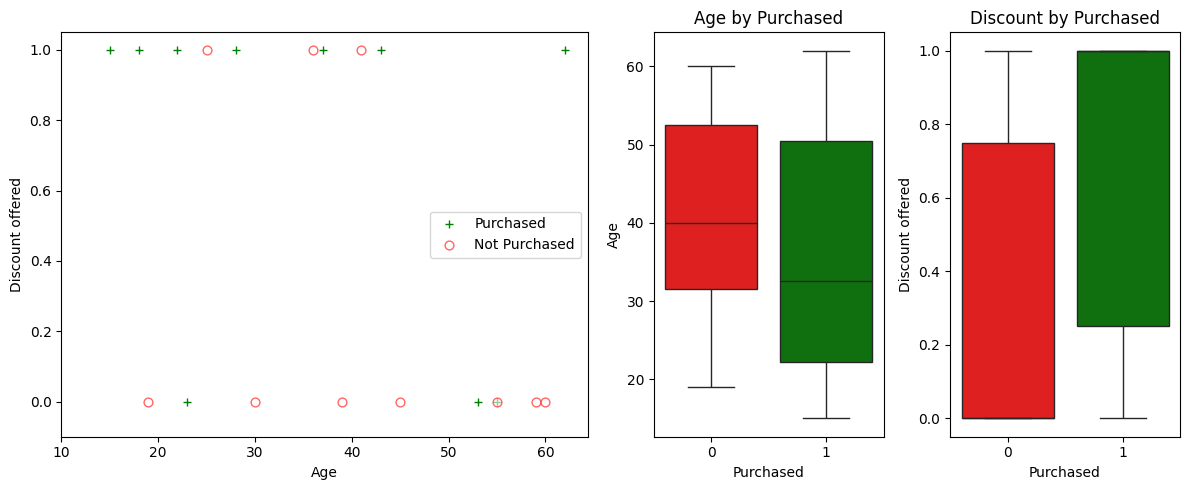

In [157]:
# Nueva figura con 12 unidades de ancho y 5 de alto.
fig = plt.figure(figsize=(12,5)) 

# Cuadrícula de subgráficos en la figura, 1 fila y 4 columnas.
gs = mpl.gridspec.GridSpec(1, 4)

# Subgráficos (o eje) en la cuadrícula definida por gs.

# Selecciona la primera fila (0) y todas las columnas excepto las dos últimas (:-2). 
# ax1 ocupa las primeras dos columnas del espacio disponible en la fila.
ax1 = plt.subplot(gs[0,:-2])

# Selecciona la primera fila (0) y la penúltima columna (-2). 
# ax2 ocupa la tercera columna del espacio disponible en la fila.
ax2 = plt.subplot(gs[0,-2])

# Selecciona la primera fila (0) y la última columna (-1). 
# ax3 ocupa la última columna del espacio disponible en la fila.
ax3 = plt.subplot(gs[0,-1])

# Toma una fracción de las muestras donde el valor objetivo (purchased) es 'no'
df_no = df[df['Purchased'] == 0]
# Toma todas las muestras donde el valor objetivo sea 'sí'
df_yes = df[df['Purchased'] == 1]
# Combina para equilibrar 
#df_ = df_no.concat(df_yes)
df_ = pd.concat([df_no, df_yes])

# Subgráfico 1: Scatter plot de Edad vs Descuento
ax1.scatter(df_[df_['Purchased'] == 1]['Age'], df_[df_['Purchased'] == 1]['Discount offered'],
            s=40, c='green', marker='+', linewidths=1, label='Purchased')
ax1.scatter(df_[df_['Purchased'] == 0]['Age'], df_[df_['Purchased'] == 0]['Discount offered'],
            s=40, marker='o', linewidths=1, edgecolors='red', facecolors='white', alpha=.6, label='Not Purchased')

ax1.set_ylim(ymin=-0.1)
ax1.set_ylabel('Discount offered')
ax1.set_xlim(xmin=10)
ax1.set_xlabel('Age')
ax1.legend()

# Subgráfico 2: Boxplot de Edad por si Compraron o No
c_palette = {0: 'red', 1: 'green'}
sns.boxplot(x='Purchased', y='Age', data=df, ax=ax2, hue='Purchased', palette=c_palette, legend=False)
ax2.set_title('Age by Purchased')

# Subgráfico 3: Boxplot de Número de Visitas a la Página del Producto por si Compraron o No
sns.boxplot(x='Purchased', y='Discount offered', data=df, ax=ax3, hue='Purchased', palette=c_palette, legend=False)
ax3.set_title('Discount by Purchased')

# Ajustar el diseño
gs.tight_layout(plt.gcf())

# Mostrar la figura
plt.show()


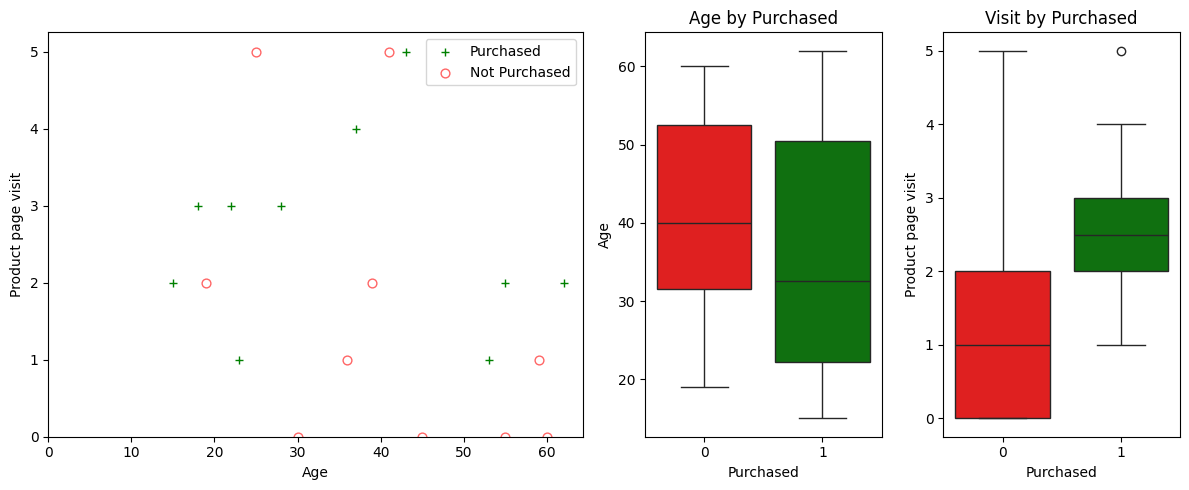

In [168]:
# Nueva figura con 12 unidades de ancho y 5 de alto.
fig = plt.figure(figsize=(12,5)) 

# Cuadrícula de subgráficos en la figura, 1 fila y 4 columnas.
gs = mpl.gridspec.GridSpec(1, 4)

# Subgráficos (o eje) en la cuadrícula definida por gs.

# Selecciona la primera fila (0) y todas las columnas excepto las dos últimas (:-2). 
# ax1 ocupa las primeras dos columnas del espacio disponible en la fila.
ax1 = plt.subplot(gs[0,:-2])

# Selecciona la primera fila (0) y la penúltima columna (-2). 
# ax2 ocupa la tercera columna del espacio disponible en la fila.
ax2 = plt.subplot(gs[0,-2])

# Selecciona la primera fila (0) y la última columna (-1). 
# ax3 ocupa la última columna del espacio disponible en la fila.
ax3 = plt.subplot(gs[0,-1])

# Toma una fracción de las muestras donde el valor objetivo (purchased) es 'no'
df_no = df[df['Purchased'] == 0]
# Toma todas las muestras donde el valor objetivo sea 'sí'
df_yes = df[df['Purchased'] == 1]
# Combina para equilibrar 
#df_ = df_no.concat(df_yes)
df_ = pd.concat([df_no, df_yes])

# Subgráfico 1: Scatter plot de Edad vs Descuento
ax1.scatter(df_[df_['Purchased'] == 1]['Age'], df_[df_['Purchased'] == 1]['Product page visit'],
            s=40, c='green', marker='+', linewidths=1, label='Purchased')
ax1.scatter(df_[df_['Purchased'] == 0]['Age'], df_[df_['Purchased'] == 0]['Product page visit'],
            s=40, marker='o', linewidths=1, edgecolors='red', facecolors='white', alpha=.6, label='Not Purchased')

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Product page visit')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('Age')
ax1.legend()

# Subgráfico 2: Boxplot de Edad por si Compraron o No
c_palette = {0: 'red', 1: 'green'}
sns.boxplot(x='Purchased', y='Age', data=df, ax=ax2, hue='Purchased', palette=c_palette, legend=False)
ax2.set_title('Age by Purchased')

# Subgráfico 3: Boxplot de Número de Visitas a la Página del Producto por si Compraron o No
sns.boxplot(x='Purchased', y='Product page visit', data=df, ax=ax3, hue='Purchased', palette=c_palette, legend=False)
ax3.set_title('Visit by Purchased')

# Ajustar el diseño
gs.tight_layout(plt.gcf())

# Mostrar la figura
plt.show()

### Logistic Regression

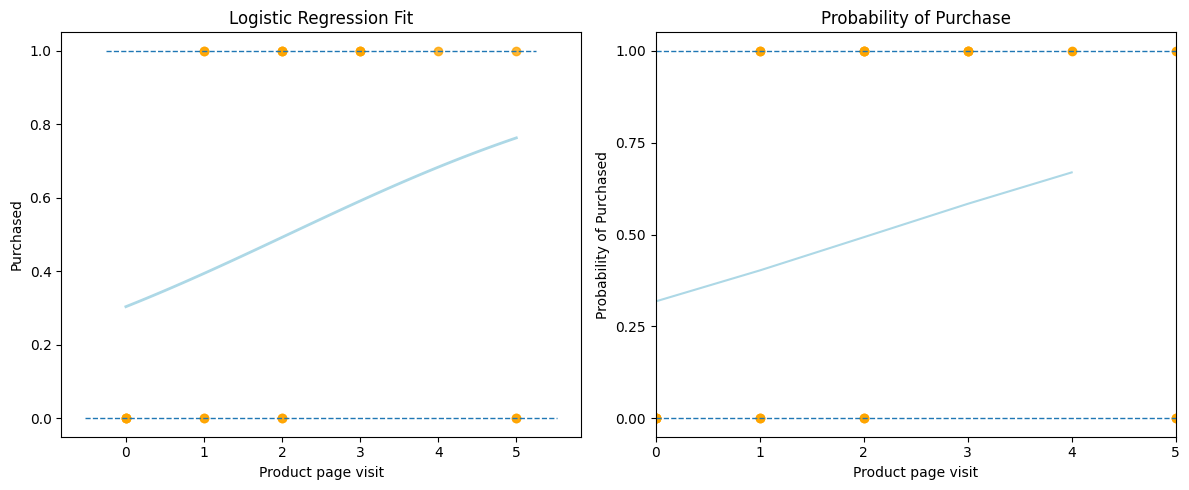

In [170]:
# Preparación de los datos
X_train = df['Product page visit'].values.reshape(-1,1)
y = df['Purchased']

# Crear datos de prueba
X_test = np.arange(df['Product page visit'].min(), df['Product page visit'].max()).reshape(-1,1)

# Ajustar el modelo de regresión logística
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y)
prob = clf.predict_proba(X_test)

# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subgráfico izquierdo
sns.regplot(x=df['Product page visit'], y=df['Purchased'], data=df, logistic=True, ci=None,
            scatter_kws={'color': 'orange'},
            line_kws={'color': 'lightblue', 'lw': 2}, ax=ax1)
ax1.set_title('Logistic Regression Fit')

# Subgráfico derecho
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:, 1], color='lightblue')
ax2.set_title('Probability of Purchase')
ax2.set_ylabel('Probability of Purchased')
ax2.set_xlabel('Product page visit')
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.])
ax2.set_xlim(xmin=df['Product page visit'].min(), xmax=df['Product page visit'].max())

# Líneas horizontales en ambos subgráficos
for ax in fig.axes:
    ax.hlines(1, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='dashed', lw=1)

plt.tight_layout()
plt.show()


In [175]:
y = df['Purchased']

**scikit-learn**

In [172]:
# Al utilizar el solucionador Newton-Cg, los coeficientes son iguales o más cercanos a los del libro.
# No conozco los detalles de las diferencias entre los solucionadores
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df['Product page visit'].values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)



LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.36630463]]
intercept : [-0.76161698]


**statsmodels**

In [177]:
import statsmodels.api as sm

# Preparar los datos
X_train = sm.add_constant(df['Product page visit'])

# Crear el modelo Logit y ajustarlo
model = sm.Logit(y, X_train)
result = model.fit()

# Mostrar el resumen del modelo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.645006
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                 0.06945
Time:                        21:00:12   Log-Likelihood:                -12.900
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                    0.1652
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8294      0.776     -1.069      0.285      -2.350       0.691
Produ

In [180]:
# Preparar los datos
X_train = sm.add_constant(df['Discount offered'])
y = df['Purchased']

# Crear el modelo Logit y ajustarlo
model = sm.Logit(y, X_train)
result = model.fit()

# Mostrar el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.610864
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.1187
Time:                        21:05:03   Log-Likelihood:                -12.217
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                   0.06965
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8473      0.690     -1.228      0.220      -2.200       0.505
Discount of

### Multiple Logistic Regression

In [182]:
# Preparar los datos
X_train = sm.add_constant(df[['Product page visit', 'Age', 'Discount offered']])
y = df['Purchased']

# Crear el modelo Logit y ajustarlo
model = sm.Logit(y, X_train)
result = model.fit()

# Mostrar el resumen del modelo
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.610161
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.1197
Time:                        21:07:50   Log-Likelihood:                -12.203
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                    0.3449
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6590      1.741     -0.378      0.705      -4.072       2.754
Produ

### Confounding

In [185]:
# balance and default vectors for discount
X_train = df[df['Discount offered'] == 1]['Product page visit'].values.reshape(df[df['Discount offered'] == 1]['Discount offered'].size,1) 
y = df[df['Discount offered'] == 1]['Purchased']

# balance and default vectors for non-students
X_train2 = df[df['Discount offered'] == 0]['Product page visit'].values.reshape(df[df['Discount offered'] == 0]['Product page visit'].size,1) 
y2 = df[df['Discount offered'] == 0]['Purchased']

# Vector with balance values for plotting
X_test = np.arange(df['Product page visit'].min(), df['Product page visit'].max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [189]:
# Crear un mapeo temporal
mapping = {0: 'No', 1: 'Yes'}

# Crear un DataFrame temporal para la visualización
df_temp = df.copy()
df_temp['Purchased'] = df_temp['Purchased'].map(mapping)
df_temp['Discount offered'] = df_temp['Discount offered'].map(mapping)

df_temp.groupby(['Discount offered','Purchased']).size().unstack('Purchased')

Purchased,No,Yes
Discount offered,,
No,7,3
Yes,3,7


<Axes: xlabel='Discount offered', ylabel='Product page visit'>

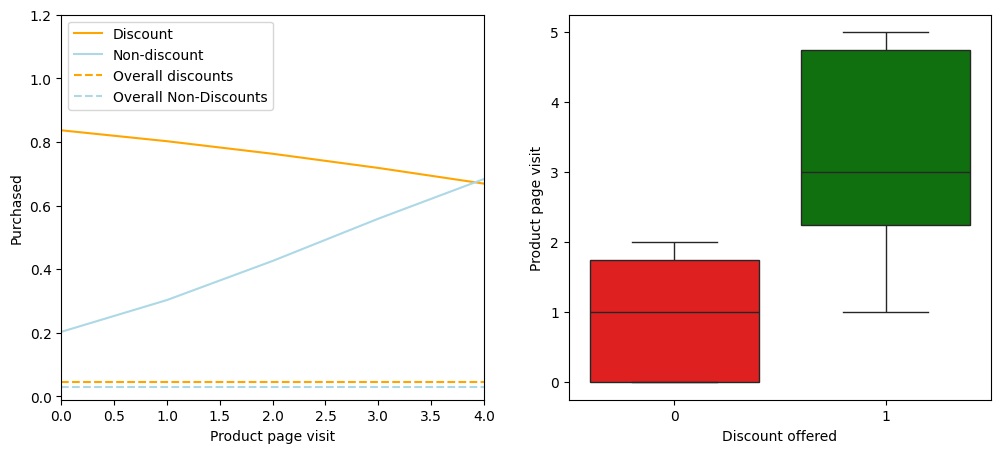

In [195]:
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Discount')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-discount')
ax1.hlines(127/2817, colors='orange', label='Overall discounts',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Discounts',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Purchased')
ax1.set_xlabel('Product page visit')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.,1.2])
ax1.set_xlim(0,4)
ax1.legend(loc=2)

# Right plot
sns.boxplot(x='Discount offered',y='Product page visit',  hue='Discount offered', data=df, ax=ax2,  palette=c_palette, legend=False)